# **Imports**

In [1]:
# Common
import os
import keras
import datetime
import numpy as np
from tqdm import tqdm 
from glob import glob
import tensorflow as tf
import tensorflow.image as tfi

# Data
from keras.preprocessing.image import load_img, img_to_array 

# Data Viz
import matplotlib.pyplot as plt

# Model
from keras import layers
from keras.layers import ReLU
from keras.layers import Layer
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPool2D,MaxPooling2D,Add,Activation
from tensorflow.keras.layers import Input, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Activation, add, multiply, UpSampling2D
from keras.layers import LeakyReLU
from keras.layers import concatenate
from keras.layers import ZeroPadding2D
from keras.layers import Conv2DTranspose
from keras.initializers import RandomNormal
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model, load_model

# Model Viz
from tensorflow.keras.utils import plot_model

# Model Losses
from keras.losses import BinaryCrossentropy
from keras.losses import MeanAbsoluteError

# **Data**

In [2]:
def load_data(path, trim=1000):
    color_paths = sorted(glob(path + "*.jpg"))[:trim]
    gray_paths = []
    
    for path in color_paths:
        gray_paths.append(path.replace('color/', 'gray/'))
    
    images = np.zeros(shape=(len(color_paths), 256, 256, 3))
    masks = np.zeros(shape=(len(gray_paths), 256, 256, 3))
    

    i=0
    for color_path, gray_path in tqdm(zip(color_paths, gray_paths), desc="Data"):
        
        image = tf.cast(img_to_array(load_img(color_path)), tf.float32)
        mask = tf.cast(img_to_array(load_img(gray_path)), tf.float32)
        
        images[i] = (tfi.resize(image,(256,256)))/255.
        masks[i] = (tfi.resize(mask,(256,256)))/255.

        i+=1
    
    return images, masks

In [3]:
path = '../input/landscape-image-colorization/landscape Images/color/'
color_images, gray_images = load_data(path)

Data: 0it [00:00, ?it/s]2022-12-12 03:30:12.155400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 03:30:12.156311: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 03:30:12.415993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 03:30:12.416808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 03:30:12.417596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successf

In [4]:
len(color_images)

1000

In [5]:
def show_image(image, title=None, alpha=1.0):
    plt.imshow(image, alpha=alpha)
    if title is not None:
        plt.title(title)
    plt.axis('off')

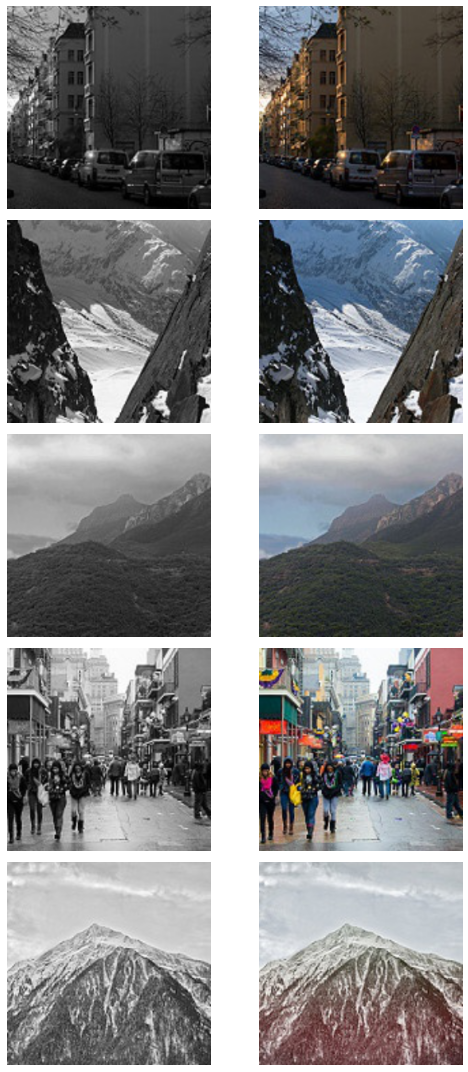

In [6]:
plt.figure(figsize=(8,15))
n = 0
for i in range(10):
    plt.subplot(5,2,i+1)
    if n==0:
        color, gray = color_images[i], gray_images[i]   
        show_image(gray)
        n+=1
    elif n==1:
        show_image(color)
        n=0
plt.tight_layout()
plt.show()

In [ ]:
!pip install segmentation_models

import segmentation_models as sm

# LinkNet

In [ ]:
sm.set_framework('tf.keras')

sm.framework()

In [ ]:

model = sm.Linknet(backbone_name='vgg16', input_shape=(256, 256, 3), classes=3, encoder_weights='imagenet')
generator =model
# #generator.summary()

# UNET Models

* U-net
* V-net
* Attention-Unet
* U-net++
* UNET 3+
* R2U-net
* ResUnet-a
* U^2-Net
* TransUNET
* Swin-UNET
* LinkNet

In [ ]:
print('TensorFlow {}; Keras {}'.format(tf.__version__, keras.__version__))


In [ ]:
!pip install keras_unet_collection
from keras_unet_collection import models

## V-Net  

In [ ]:
model = models.vnet_2d((256, 256, 3), filter_num=[16, 32, 64, 128, 256], n_labels=3,
                      res_num_ini=1, res_num_max=3, 
                      activation='PReLU', output_activation='Sigmoid', 
                      batch_norm=True, pool='max', unpool=False, name='vnet')
model.summary()
generator = model

In [ ]:
model.output_shape

## Attention-Unet 

In [ ]:
model = models.att_unet_2d((256, 256, 3), [16, 32, 64, 128, 256], n_labels=3,
                           stack_num_down=2, stack_num_up=2,
                           activation='ReLU', atten_activation='ReLU', attention='add', output_activation='Sigmoid', 
                           batch_norm=True, pool='max', name='attunet')
#model.summary()
generator = model

In [ ]:
model.output_shape

## U-net++ 


In [ ]:
model = models.unet_plus_2d((256, 256, 3), [64, 128, 256, 512], n_labels=3,
                            stack_num_down=2, stack_num_up=2,
                            activation='LeakyReLU', output_activation='Sigmoid', 
                            batch_norm=False, pool='max', unpool=False, deep_supervision=False, name='unet_plus')
#model.summary()
generator = model

In [ ]:
model.output_shape

In [ ]:
plot_model(generator, "GeneratorUNet.png",show_shapes=True, expand_nested=True, dpi=126)

## UNET 3+


In [ ]:
model = models.unet_3plus_2d((256, 256, 3), n_labels=3, filter_num_down=[64, 128, 256, 512], 
                             filter_num_skip='auto', filter_num_aggregate='auto', 
                             stack_num_down=2, stack_num_up=1, activation='ReLU', output_activation='Sigmoid',
                             batch_norm=True, pool='max', unpool=False, deep_supervision=False, name='unet3plus')

#model.summary()
generator = model

In [ ]:
model.output_shape

In [ ]:
plot_model(generator, "GeneratorUNet.png",show_shapes=True, expand_nested=True, dpi=126)

## R2U-net 


In [ ]:
model = models.r2_unet_2d((256,256, 3), [64, 128, 256, 512], n_labels=3,
                          stack_num_down=2, stack_num_up=1, recur_num=2,
                          activation='ReLU', output_activation='Sigmoid', 
                          batch_norm=True, pool='max', unpool='nearest', name='r2unet')
#model.summary()
generator = model

In [ ]:
model.output_shape

In [ ]:
plot_model(generator, "GeneratorUNet.png",show_shapes=True, expand_nested=True, dpi=126)

## ResUnet-a 
takes time

In [ ]:
model = models.resunet_a_2d((256, 256, 3), [32, 64, 128, 256], 
                            dilation_num=[1, 3, 15, 31], 
                            n_labels=3, aspp_num_down=256, aspp_num_up=128, 
                            activation='ReLU', output_activation='Sigmoid', 
                            batch_norm=True, pool='max', name='resunet')
#model.summary()
generator = model

In [ ]:
model.output_shape

In [ ]:
plot_model(generator, "GeneratorUNet.png",show_shapes=True, expand_nested=True, dpi=126)

## U^2-Net 


In [ ]:

model = models.u2net_2d((256,256, 3), n_labels=3, 
                        filter_num_down=[64, 128, 256, 512], filter_num_up=[64, 64, 128, 256], 
                        filter_mid_num_down=[32, 32, 64, 128], filter_mid_num_up=[16, 32, 64, 128], 
                        filter_4f_num=[512, 512], filter_4f_mid_num=[256, 256], 
                        activation='ReLU', output_activation='Sigmoid', 
                        batch_norm=True, pool='max', unpool=False, deep_supervision=False, name='u2net')

generator = model
#generator.summary()

In [ ]:

model.output_shape

In [ ]:
plot_model(generator, "GeneratorUNet.png",show_shapes=True, expand_nested=True, dpi=126)

## TransUNET


In [ ]:
model = models.transunet_2d((256, 256, 3), filter_num=[64, 128, 256, 512], n_labels=3, stack_num_down=2, stack_num_up=2,
                                embed_dim=768, num_mlp=3072, num_heads=12, num_transformer=12,
                                activation='ReLU', mlp_activation='GELU', output_activation='Softmax', 
                                batch_norm=True, pool=True, name='transunet')
#model.summary()
generator = model

In [ ]:
model.output_shape

## Swin-UNET 

In [ ]:
model = models.swin_unet_2d((256,256, 3), filter_num_begin=64, n_labels=3, depth=4, stack_num_down=2, stack_num_up=2, 
                            patch_size=(2, 2), num_heads=[4, 8, 8, 8], window_size=[4, 2, 2, 2], num_mlp=512, 
                            output_activation='Sigmoid', shift_window=True, name='swin_unet')
#model.summary()
genertor = model

In [ ]:
model.output_shape

# ----------------------------------------------------------------

# Our Model 

In [7]:
def rec_res_block(input_layer, out_n_filters, batch_normalization=False, kernel_size=[3, 3], stride=[1, 1],

                  padding='same', data_format='channels_first'):
    if data_format == 'channels_first':
        input_n_filters = input_layer.get_shape().as_list()[1]
    else:
        input_n_filters = input_layer.get_shape().as_list()[3]

    if out_n_filters != input_n_filters:
        skip_layer = Conv2D(out_n_filters, [1, 1], strides=stride, padding=padding, data_format=data_format)(
            input_layer)
    else:
        skip_layer = input_layer

    layer = skip_layer
    for j in range(2):

        for i in range(2):
            if i == 0:

                layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding, data_format=data_format)(
                    layer)
                if batch_normalization:
                    layer1 = BatchNormalization()(layer1)
                layer1 = Activation('relu')(layer1)
            layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding, data_format=data_format)(
                add([layer1, layer]))
            if batch_normalization:
                layer1 = BatchNormalization()(layer1)
            layer1 = Activation('relu')(layer1)
        layer = layer1

    out_layer = add([layer, skip_layer])
    return out_layer

In [8]:
def bn_act(x, act=True):
    x = tf.keras.layers.BatchNormalization()(x)
    if act == True:
        x = tf.keras.layers.Activation("relu")(x)
    return x 

def conv_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    
    conv = bn_act(x)
    conv = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(conv)
    return conv 

def stem(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    conv = conv_block(conv, filters, kernel_size=kernel_size, padding=padding, strides=strides)

    shortcut = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)

    output = tf.keras.layers.Add()([conv, shortcut])
    return output 

def residual_block(x, filters, kernel_size=(3, 3), padding='same', strides=1):
    res = conv_block(x, filters, kernel_size=kernel_size, padding=padding, strides=strides)
    #res = conv_block(res, filters, kernel_size=kernel_size, padding=padding, strides=1)
    res= rec_res_block(res, filters, data_format='channels_last')
    shortcut = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)
    
    output = tf.keras.layers.Add()([shortcut, res])
    return output

def upsample_concat_block(x, xskip):
    u = tf.keras.layers.UpSampling2D((2, 2))(x)
    c = tf.keras.layers.Concatenate()([u, xskip])
    return c 

In [9]:
def MyModel():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((256,256, 3))
    
    ## ENCODER 
    e0 = inputs
    e1 = stem(e0, f[0])
    e2 = residual_block(e1, f[1], strides=2)
    e3 = residual_block(e2, f[2], strides=2)
    e4 = residual_block(e3, f[3], strides=2)
    e5 = residual_block(e4, f[4], strides=2)

    # BRIDGE
    b0 = conv_block(e5, f[4], strides=1)
    b1 = conv_block(b0, f[4], strides=1)

    # DECODER 
    u1 = upsample_concat_block(b1, e4)
    d1 = residual_block(u1, f[4])

    u2 = upsample_concat_block(d1, e3)
    d2 = residual_block(u2, f[3])

    u3 = upsample_concat_block(d2, e2)
    d3 = residual_block(u3, f[2])

    u4 = upsample_concat_block(d3, e1)
    d4 = residual_block(u4, f[1])

    outputs = keras.layers.Conv2D(3, (1, 1), padding='same', activation='sigmoid')(d4)
    model = keras.models.Model(inputs, outputs)
    return model

In [10]:
generator = MyModel()
generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

## **Encoder Block**

This block uses a **Conv2D layer** this time with **Strides = 2**, replacing the need of a MaxPooling Layer. This also make the model learn better. Each time the **Image/Feature Maps** are passed through the layer the **Spatial Dimension** is reduced by **2**.

In [14]:
def downsample(filters, apply_batchnorm=True):

    model = Sequential(
        Conv2D(filters, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False),
    )

    if apply_batchnorm:
        model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))

    return model

## **Model Viz**

In [11]:
plot_model(generator, "GeneratorUNet.png", expand_nested=True, dpi=256)

# **Discriminator**

## **Discriminator Model**

**Discriminator** is a regular **Convolutional Classifier**. The intution behind **Discriminator** is that it takes 2 inputs the **Original Image** and the **Generated Mask**, it learns to **discriminate** the **Mask** if it finds that the Mask is **not the Mask** of the **Original Image**.

In [15]:
def Discriminator():
    init = RandomNormal(stddev=0.02)

    image = Input(shape=(256,256,3), name="ImageInput")
    target = Input(shape=(256,256,3), name="TargetInput")
    x = concatenate([image, target])

    x = downsample(64, apply_batchnorm=False)(x)
    x = downsample(128)(x)
    x = downsample(512)(x)

    x = ZeroPadding2D()(x)
    x = Conv2D(512, kernel_size=4, strides=1, kernel_initializer=init, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = ZeroPadding2D()(x)

    x = Conv2D(1, kernel_size=4, kernel_initializer=init)(x)

    model = Model(
        inputs=[image, target],
        outputs=x,
        name="Discriminator"
    )

    return model

In [16]:
discriminator = Discriminator()
discriminator.summary()

Model: "Discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageInput (InputLayer)         [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
TargetInput (InputLayer)        [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 256, 256, 6)  0           ImageInput[0][0]                 
                                                                 TargetInput[0][0]                
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128, 128, 64) 6144        concatenate_5[0][0]  

## **Model Viz**

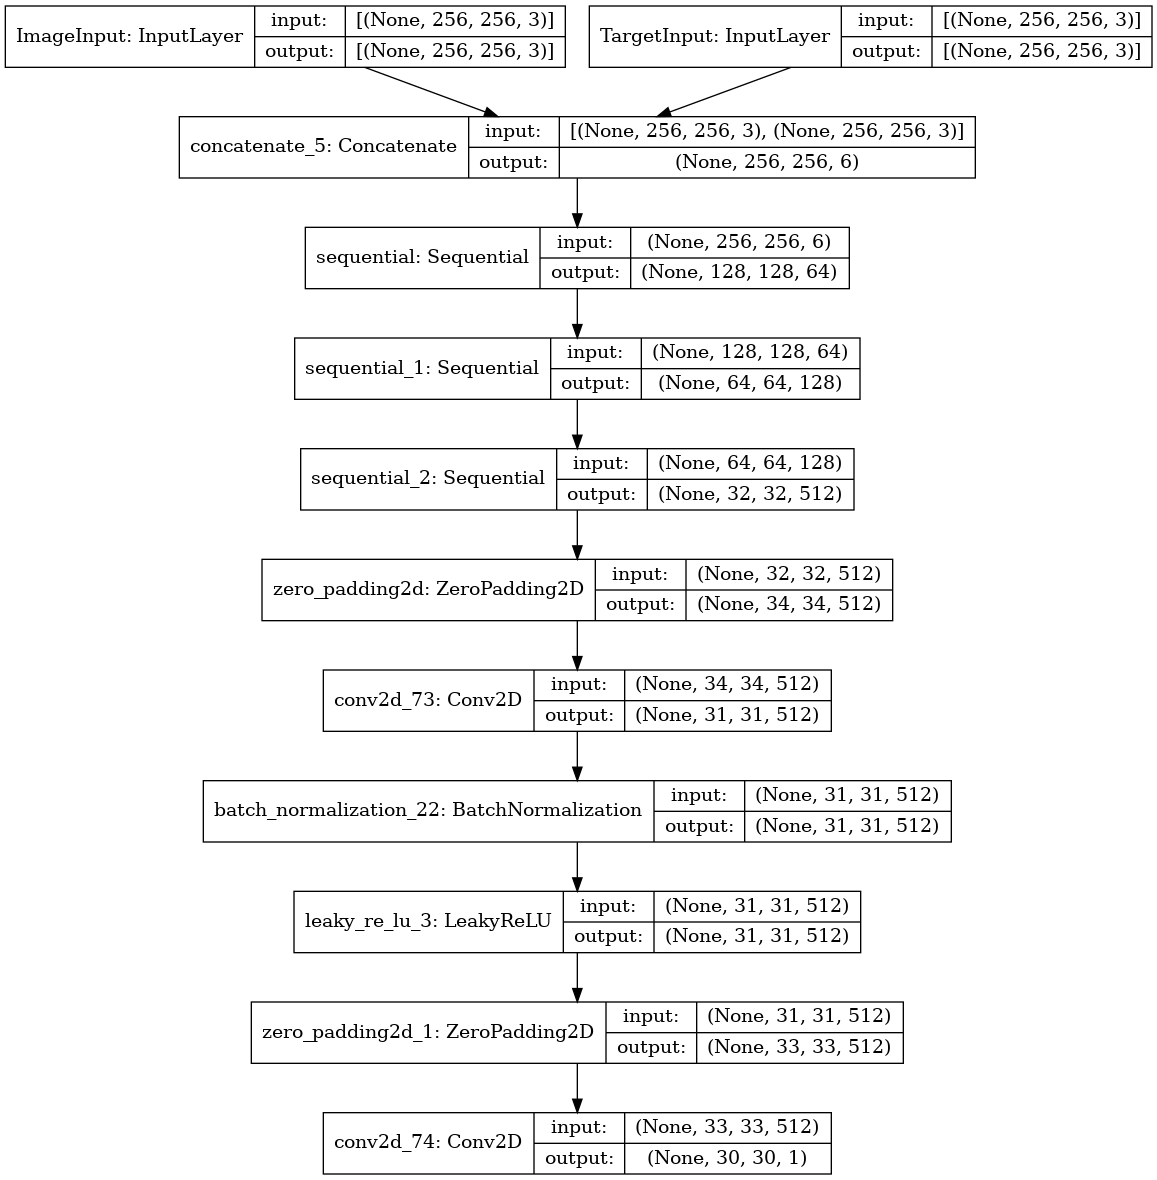

In [17]:
plot_model(discriminator,"Discriminator.png", show_shapes=True)

# **Compiling**

In [18]:
loss_object = BinaryCrossentropy(from_logits=True)
generator_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_optimizer = Adam(2e-4, beta_1=0.5)

# **Custom Training Functions**

In [19]:
def gen_loss(disc_gen_generated, gen_out, target_img):
    gan_loss = loss_object(tf.ones_like(disc_gen_generated), disc_gen_generated)

    l1_loss = tf.reduce_mean(tf.abs(target_img - gen_out))

    total_loss = (100 * l1_loss) + gan_loss
    #print(f'gan_loss-> {gan_loss} , l1_loss-> {l1_loss},total_loss-> {total_loss}')
    return total_loss, gan_loss, l1_loss

In [20]:
def disc_loss(dis_real_output, disc_gen_output):
    
    real_loss = loss_object(tf.ones_like(dis_real_output), dis_real_output)
    fake_loss = loss_object(tf.zeros_like(disc_gen_output), disc_gen_output)

    total_loss = real_loss + fake_loss
    #print(f'disc_loss-> {total_loss}')
    return total_loss

In [21]:
@tf.function()
def train_step(inputs, target):

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        
        #Generating images using input_images(fake)
        gen_output = generator(inputs, training=True,)
        #print(gen_output.shape)
        disc_real_output   = discriminator([inputs, target], training=True)
        disc_gen_generated = discriminator([inputs, gen_output], training=True)
        
        #generator Loss
        gen_total_loss, gen_gan_loss, gen_l1_loss = gen_loss(disc_gen_generated, gen_output, target)
        
        #discriminator Loss
        Disc_loss = disc_loss(disc_real_output, disc_gen_generated)
    
    
    G_loss=gen_gan_loss
    L1_loss=gen_l1_loss
    T_loss= gen_total_loss
    D_loss=Disc_loss
        
    generator_gradients = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    
    discriminator_gradients = disc_tape.gradient(Disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))
    
    return G_loss,L1_loss,T_loss,D_loss
    #print(generator.history.history)

# **Training**

In [22]:
def show_predictions(image, mask):
    
    
    plt.tight_layout()

In [23]:
def show_performance(n_images):
    for image, mask in data.take(n_images):
        id = np.random.randint(len(image))
        pred_out = generator.predict(image)[id]
        mask = mask[id]
        image = image[id]

        plt.figure(figsize=(8,5))

        plt.subplot(1,3,1)
        show_image(image, title="Black & White Image")

        plt.subplot(1,3,2)
        show_image(mask, title="Original Color Image")

        plt.subplot(1,3,3)
        show_image(pred_out, title="Predicted Color Image")
        
       
        plt.show()

In [24]:

def fit(epochs=1):
    G_loss=[]
    D_loss=[]
    L1_loss=[]
    T_loss =[]
    for epoch in tqdm(range(epochs)):
        
        for images, targets in data:

            G,L,T,D=train_step(images, targets)
            
        
        
            
            
            
        G_loss.append(G.numpy())
        D_loss.append(D.numpy())
        L1_loss.append(L.numpy())
        T_loss.append(T.numpy())  
            
        print(f'Epoch-> {epoch+1}/{epochs} Gan_loss-> {G.numpy()}, Disc_loss-> {D.numpy()}, L1_loss-> {L.numpy()}, Total_loss->{T.numpy()}') 
    return G_loss, D_loss, L1_loss, T_loss
       
            

In [25]:
color_images, gray_images = tf.cast(color_images, tf.float32), tf.cast(gray_images, tf.float32)
dataset = (gray_images,color_images)
data = tf.data.Dataset.from_tensor_slices(dataset).batch(4, drop_remainder=True)

2022-12-12 03:32:58.819845: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1572864000 exceeds 10% of free system memory.
2022-12-12 03:33:01.249368: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1572864000 exceeds 10% of free system memory.


In [26]:
data

<BatchDataset shapes: ((4, 256, 256, 3), (4, 256, 256, 3)), types: (tf.float32, tf.float32)>

In [27]:
G_loss, D_loss, L1_loss, T_loss=fit(25)


  0%|          | 0/25 [00:00<?, ?it/s]2022-12-12 03:33:13.858907: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-12 03:33:17.600849: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
  4%|▍         | 1/25 [01:37<38:54, 97.28s/it]

Epoch-> 1/25 Gan_loss-> 3.708641529083252, Disc_loss-> 0.4109593331813812, L1_loss-> 0.07308030873537064, Total_loss->11.016672134399414


  8%|▊         | 2/25 [02:54<32:41, 85.29s/it]

Epoch-> 2/25 Gan_loss-> 5.286313056945801, Disc_loss-> 0.018962033092975616, L1_loss-> 0.07662910968065262, Total_loss->12.949224472045898


 12%|█▏        | 3/25 [04:10<29:46, 81.18s/it]

Epoch-> 3/25 Gan_loss-> 0.9621201753616333, Disc_loss-> 1.5052982568740845, L1_loss-> 0.07093264907598495, Total_loss->8.05538558959961


 16%|█▌        | 4/25 [05:26<27:43, 79.23s/it]

Epoch-> 4/25 Gan_loss-> 5.900399208068848, Disc_loss-> 0.008988259360194206, L1_loss-> 0.06608730554580688, Total_loss->12.509129524230957


 20%|██        | 5/25 [06:42<26:02, 78.14s/it]

Epoch-> 5/25 Gan_loss-> 4.603174209594727, Disc_loss-> 0.3505729138851166, L1_loss-> 0.06579586863517761, Total_loss->11.182761192321777


 24%|██▍       | 6/25 [07:59<24:32, 77.49s/it]

Epoch-> 6/25 Gan_loss-> 7.176249980926514, Disc_loss-> 0.03786562383174896, L1_loss-> 0.0641036406159401, Total_loss->13.586614608764648


 28%|██▊       | 7/25 [09:15<23:06, 77.05s/it]

Epoch-> 7/25 Gan_loss-> 7.347336769104004, Disc_loss-> 0.0025146016851067543, L1_loss-> 0.07090673595666885, Total_loss->14.438010215759277


 32%|███▏      | 8/25 [10:31<21:44, 76.76s/it]

Epoch-> 8/25 Gan_loss-> 7.823711395263672, Disc_loss-> 0.0015536306891590357, L1_loss-> 0.06135127320885658, Total_loss->13.958839416503906


 36%|███▌      | 9/25 [11:48<20:28, 76.75s/it]

Epoch-> 9/25 Gan_loss-> 7.333479881286621, Disc_loss-> 0.0014158079866319895, L1_loss-> 0.05270281806588173, Total_loss->12.603761672973633


 40%|████      | 10/25 [13:04<19:08, 76.54s/it]

Epoch-> 10/25 Gan_loss-> 8.510086059570312, Disc_loss-> 0.0007533523603342474, L1_loss-> 0.050169188529253006, Total_loss->13.52700424194336


 44%|████▍     | 11/25 [14:20<17:50, 76.43s/it]

Epoch-> 11/25 Gan_loss-> 8.570821762084961, Disc_loss-> 0.0008510753978043795, L1_loss-> 0.05304598808288574, Total_loss->13.875420570373535


 48%|████▊     | 12/25 [15:36<16:33, 76.43s/it]

Epoch-> 12/25 Gan_loss-> 8.42908763885498, Disc_loss-> 0.0007026644889265299, L1_loss-> 0.046541910618543625, Total_loss->13.08327865600586


 52%|█████▏    | 13/25 [16:53<15:16, 76.37s/it]

Epoch-> 13/25 Gan_loss-> 1.0585495233535767, Disc_loss-> 1.2532575130462646, L1_loss-> 0.044343139976263046, Total_loss->5.492863178253174


 56%|█████▌    | 14/25 [18:09<13:59, 76.28s/it]

Epoch-> 14/25 Gan_loss-> 0.9416228532791138, Disc_loss-> 1.5803673267364502, L1_loss-> 0.04992637038230896, Total_loss->5.93425989151001


 60%|██████    | 15/25 [19:25<12:41, 76.19s/it]

Epoch-> 15/25 Gan_loss-> 1.1277011632919312, Disc_loss-> 1.382652759552002, L1_loss-> 0.0497482530772686, Total_loss->6.102526664733887


 64%|██████▍   | 16/25 [20:41<11:25, 76.12s/it]

Epoch-> 16/25 Gan_loss-> 3.345895767211914, Disc_loss-> 0.31358638405799866, L1_loss-> 0.056836146861314774, Total_loss->9.029510498046875


 68%|██████▊   | 17/25 [21:57<10:08, 76.08s/it]

Epoch-> 17/25 Gan_loss-> 2.6820223331451416, Disc_loss-> 0.14809437096118927, L1_loss-> 0.05110742524266243, Total_loss->7.792764663696289


 72%|███████▏  | 18/25 [23:13<08:52, 76.06s/it]

Epoch-> 18/25 Gan_loss-> 3.3769888877868652, Disc_loss-> 0.12661978602409363, L1_loss-> 0.05081816390156746, Total_loss->8.458805084228516


 76%|███████▌  | 19/25 [24:29<07:36, 76.09s/it]

Epoch-> 19/25 Gan_loss-> 7.56190824508667, Disc_loss-> 0.0035244436003267765, L1_loss-> 0.06151685118675232, Total_loss->13.713593482971191


 80%|████████  | 20/25 [25:45<06:20, 76.04s/it]

Epoch-> 20/25 Gan_loss-> 7.664339065551758, Disc_loss-> 0.001571739325299859, L1_loss-> 0.05532477796077728, Total_loss->13.196817398071289


 84%|████████▍ | 21/25 [27:01<05:04, 76.08s/it]

Epoch-> 21/25 Gan_loss-> 8.41368293762207, Disc_loss-> 0.0009507416398264468, L1_loss-> 0.05560027062892914, Total_loss->13.973710060119629


 88%|████████▊ | 22/25 [28:17<03:48, 76.08s/it]

Epoch-> 22/25 Gan_loss-> 9.413374900817871, Disc_loss-> 0.0005842578248120844, L1_loss-> 0.05097862705588341, Total_loss->14.511238098144531


 92%|█████████▏| 23/25 [29:33<02:32, 76.09s/it]

Epoch-> 23/25 Gan_loss-> 2.276012897491455, Disc_loss-> 0.44944411516189575, L1_loss-> 0.051526546478271484, Total_loss->7.4286675453186035


 96%|█████████▌| 24/25 [30:49<01:16, 76.11s/it]

Epoch-> 24/25 Gan_loss-> 3.5037410259246826, Disc_loss-> 0.270260214805603, L1_loss-> 0.051034361124038696, Total_loss->8.607176780700684


100%|██████████| 25/25 [32:05<00:00, 77.03s/it]

Epoch-> 25/25 Gan_loss-> 6.906013011932373, Disc_loss-> 0.003974859602749348, L1_loss-> 0.060610052198171616, Total_loss->12.967018127441406


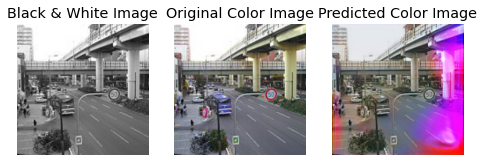

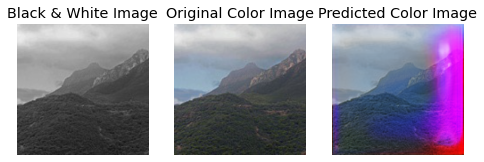

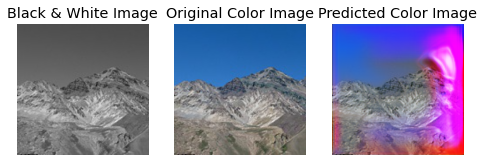

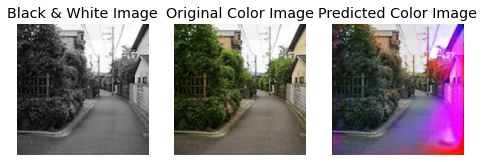

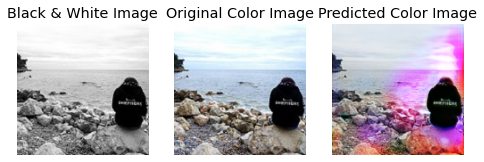

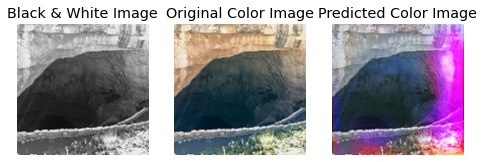

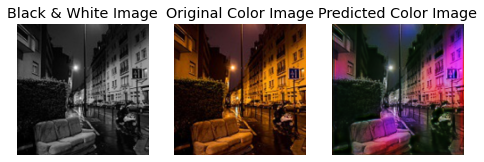

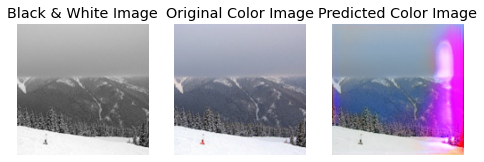

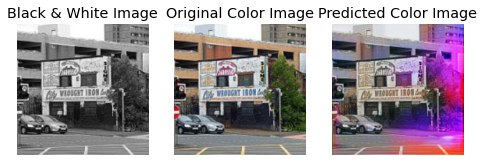

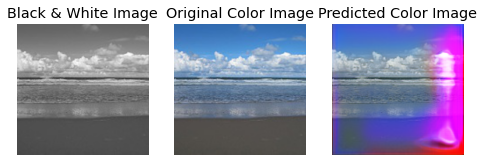

In [32]:
show_performance(10)

In [29]:
min(G_loss), min(D_loss), min(L1_loss), min(T_loss)

(0.94162285, 0.0005842578, 0.04434314, 5.492863)

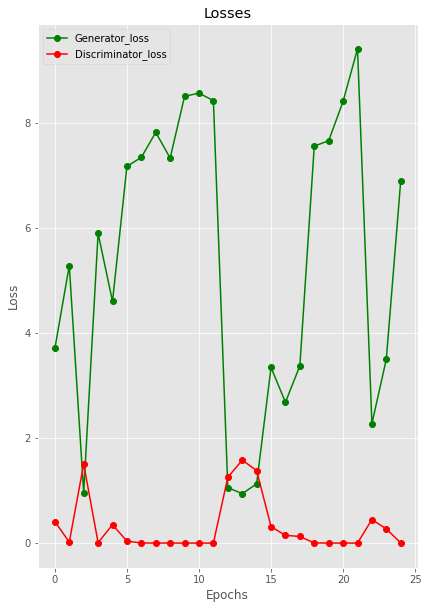

In [30]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(15,10))
epochs = range(25)
plt.subplot(1,2,1)
plt.plot(epochs,G_loss,"go-")
plt.plot(epochs,D_loss,"ro-")


plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Generator_loss','Discriminator_loss','Total_loss'],loc = "upper left")



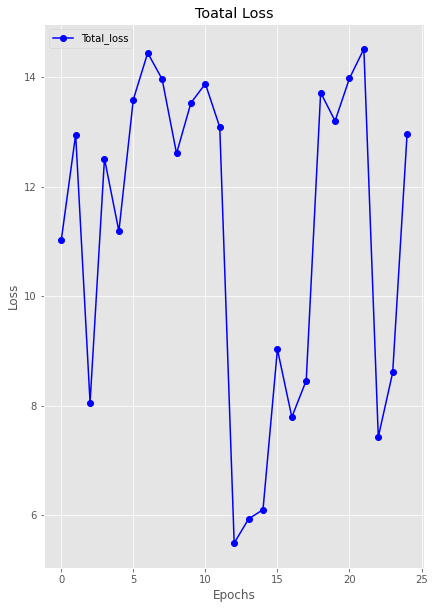

In [31]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(15,10))
epochs = range(25)
plt.subplot(1,2,1)

plt.plot(epochs,T_loss,"bo-")

plt.title("Toatal Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Total_loss'],loc = "upper left")


# Model Save

In [ ]:
#generator.save_weights("ckpt")
generator.save('MyModel_color.h5')

# **Evaluation**

In [ ]:
gen = generator.load_weights("ckpt")

In [ ]:
show_performance(10)